# Testing best CNN model on Test dataset

This notebook tests the best model on the testing data set.

## Imports, Global Variables, and Helper Functions

In [3]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Resizing
import matplotlib.pyplot as plt


import sys

In [4]:
# Importing global variables
sys.path.append('../../Code/Helper')
import helper as hp

Metal device set to: Apple M2 Max


## Data Loading

In [5]:
base_path = '../../Data/Final'
w = 48
h = 48

test = image_dataset_from_directory(
    base_path + '/test',
    image_size=(w,h),
    batch_size=32,
    color_mode='grayscale',
    label_mode='categorical',
    shuffle= False
)

Found 7178 files belonging to 7 classes.


# Modeling

## Loading Model

In [7]:
model = tf.keras.models.load_model('../../Models/ensemble1.h5')

## Read in Evaluation CSVs

The following csv file contains the training and validation metrics for our highest performing models and the training history of our best performing model.

#### Training and Validation Metrics Compared

In [52]:
df = pd.read_csv("../../Results/model_eval.csv", index_col='Unnamed: 0')
df

,train_loss,train_acc,train_precision,train_recall,train_auc,val_loss,val_acc,val_precision,val_recall,val_auc
models,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cnn_1,0.019592,0.996188,0.996360,0.996089,9.998764e-01,3.894722,0.566294,0.572741,0.561739,0.815208
cnn_2,0.684418,0.744876,0.818932,0.668119,9.603823e-01,0.986832,0.630855,0.720961,0.546985,0.921434
cnn_3,0.639057,0.762896,0.827557,0.696213,9.653100e-01,0.974511,0.631350,0.732090,0.540351,0.921400
cnn_4,0.660550,0.751064,0.819556,0.681733,9.629885e-01,0.961183,0.644618,0.733050,0.563125,0.924870
data_aug,0.955882,0.635842,0.766968,0.496213,9.228268e-01,0.956389,0.634023,0.794364,0.468957,0.923418
ensemble,0.520496,0.818416,1.000259,0.646302,1.760000e-07,NaN,NaN,NaN,NaN,NaN
ensemble,0.520496,0.818416,1.000259,0.646302,1.760000e-07,NaN,NaN,NaN,NaN,NaN


In [53]:
# Drop NaN column and repeating ensemble rows
df = df.drop(labels = ["models", "ensemble"], axis=0)
df

,train_loss,train_acc,train_precision,train_recall,train_auc,val_loss,val_acc,val_precision,val_recall,val_auc
cnn_1,0.019592,0.996188,0.996360,0.996089,0.999876,3.894722,0.566294,0.572741,0.561739,0.815208
cnn_2,0.684418,0.744876,0.818932,0.668119,0.960382,0.986832,0.630855,0.720961,0.546985,0.921434
cnn_3,0.639057,0.762896,0.827557,0.696213,0.965310,0.974511,0.631350,0.732090,0.540351,0.921400
cnn_4,0.660550,0.751064,0.819556,0.681733,0.962988,0.961183,0.644618,0.733050,0.563125,0.924870
data_aug,0.955882,0.635842,0.766968,0.496213,0.922827,0.956389,0.634023,0.794364,0.468957,0.923418


In [57]:
# Export revision
df.to_csv('../../Results/model_eval.csv')

In [58]:
df = pd.read_csv("../../Results/model_eval.csv", index_col='Unnamed: 0')
df

,train_loss,train_acc,train_precision,train_recall,train_auc,val_loss,val_acc,val_precision,val_recall,val_auc
cnn_1,0.019592,0.996188,0.996360,0.996089,0.999876,3.894722,0.566294,0.572741,0.561739,0.815208
cnn_2,0.684418,0.744876,0.818932,0.668119,0.960382,0.986832,0.630855,0.720961,0.546985,0.921434
cnn_3,0.639057,0.762896,0.827557,0.696213,0.965310,0.974511,0.631350,0.732090,0.540351,0.921400
cnn_4,0.660550,0.751064,0.819556,0.681733,0.962988,0.961183,0.644618,0.733050,0.563125,0.924870
data_aug,0.955882,0.635842,0.766968,0.496213,0.922827,0.956389,0.634023,0.794364,0.468957,0.923418


In [60]:
# Concatenate ensemble metrics to dataframe 
new_row = pd.DataFrame([[0.5205, 0.8184, 0.0, 0.0, 0.0, 1.0003, 0.6463, 0.0, 0.0, 0.0]], columns=df.columns)
new_row.index = ['ensemble']
df = pd.concat([df, new_row])
df

,train_loss,train_acc,train_precision,train_recall,train_auc,val_loss,val_acc,val_precision,val_recall,val_auc
cnn_1,0.019592,0.996188,0.996360,0.996089,0.999876,3.894722,0.566294,0.572741,0.561739,0.815208
cnn_2,0.684418,0.744876,0.818932,0.668119,0.960382,0.986832,0.630855,0.720961,0.546985,0.921434
cnn_3,0.639057,0.762896,0.827557,0.696213,0.965310,0.974511,0.631350,0.732090,0.540351,0.921400
cnn_4,0.660550,0.751064,0.819556,0.681733,0.962988,0.961183,0.644618,0.733050,0.563125,0.924870
data_aug,0.955882,0.635842,0.766968,0.496213,0.922827,0.956389,0.634023,0.794364,0.468957,0.923418
ensemble,0.520500,0.818400,0.000000,0.000000,0.000000,1.000300,0.646300,0.000000,0.000000,0.000000


In [61]:
# Export revision
df.to_csv('../../Results/model_eval.csv')

In [69]:
df[["train_loss", "train_acc", "val_loss", "val_acc"]]

,train_loss,train_acc,val_loss,val_acc
cnn_1,0.019592,0.996188,3.894722,0.566294
cnn_2,0.684418,0.744876,0.986832,0.630855
cnn_3,0.639057,0.762896,0.974511,0.631350
cnn_4,0.660550,0.751064,0.961183,0.644618
data_aug,0.955882,0.635842,0.956389,0.634023
ensemble,0.520500,0.818400,1.000300,0.646300


**Looking at the validation accuracy and precision, the best model the custom CNN ensemble model. It has the highest validation accuracy score. It is important to note that the ensemble model has a higher validation loss score compared to the other CNN models. Further evaluation on how the model performs on the test dataset will be conducted below.**

## Evaluation on Test Set

When evaluating the "best" model on our test dataset, the accuracy score decreased from 64.63% to 63.15%. This indicates that the model is not generalizing well to new, unseen data. Model 4 which has the next highest accuracy score and a lower validation loss score than the ensemble model performs worse on the test dataset than the ensemble model. Thus, it can be safely concluded that the ensemble model performs the best.

In [65]:
test_scores = model.evaluate(test)

225/225 [==============================] - 3s 15ms/step - loss: 1.0823 - acc: 0.6315


In [70]:
model4 = tf.keras.models.load_model('../../Models/model4.h5')

In [71]:
test_4 = model4.evaluate(test)

225/225 [==============================] - 3s 10ms/step - loss: 1.0443 - acc: 0.6191 - precision_14: 0.7108 - recall_14: 0.5336 - auc_14: 0.9121


## Graphing

#### Set Plot Style

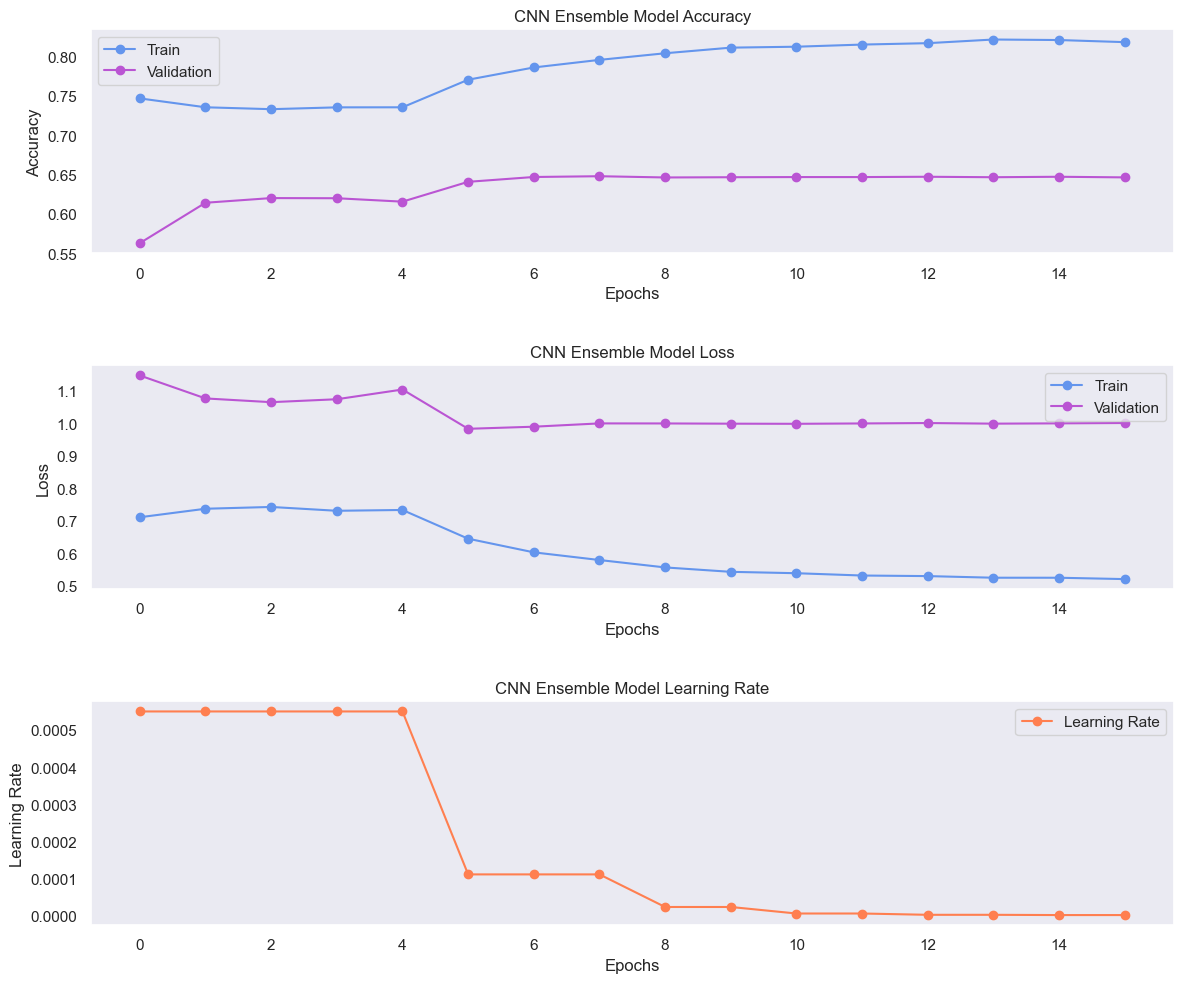

In [30]:
hp.plot_hist(h6, 'CNN Ensemble Model')

225/225 [==============================] - 2s 8ms/step


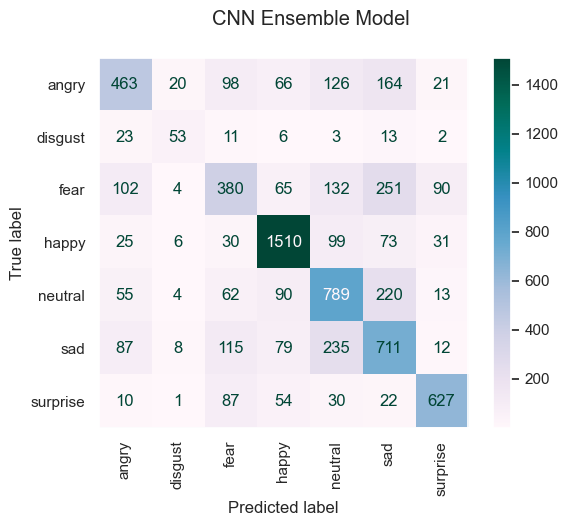

In [72]:
hp.plot_confusion_matrix(test, model, 'CNN Ensemble Model')

225/225 [==============================] - 2s 8ms/step


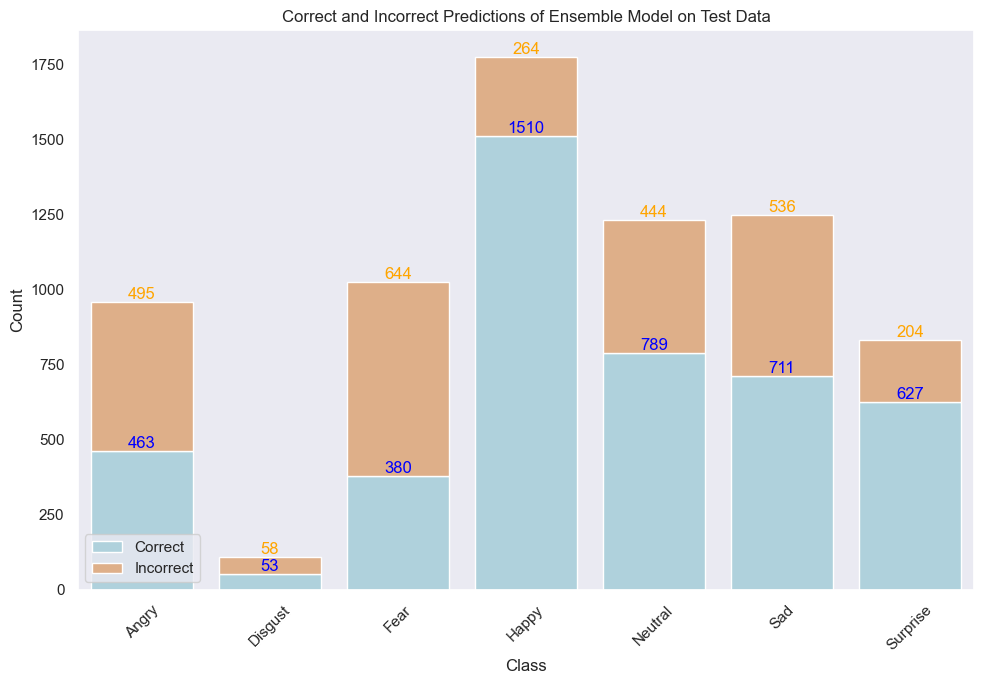

In [74]:
hp.plot_correct_dist(test, model, 'Ensemble Model on Test Data')

**It's important to note that the test dataset had very imbalanced classes to begin with in the original FER 2013 dataset. To combat the data imbalance, further images from AffectNet were added to the training dataset and data augmentation was performed to obtain a `disgust` class with equal observations to the rest of the classes.**

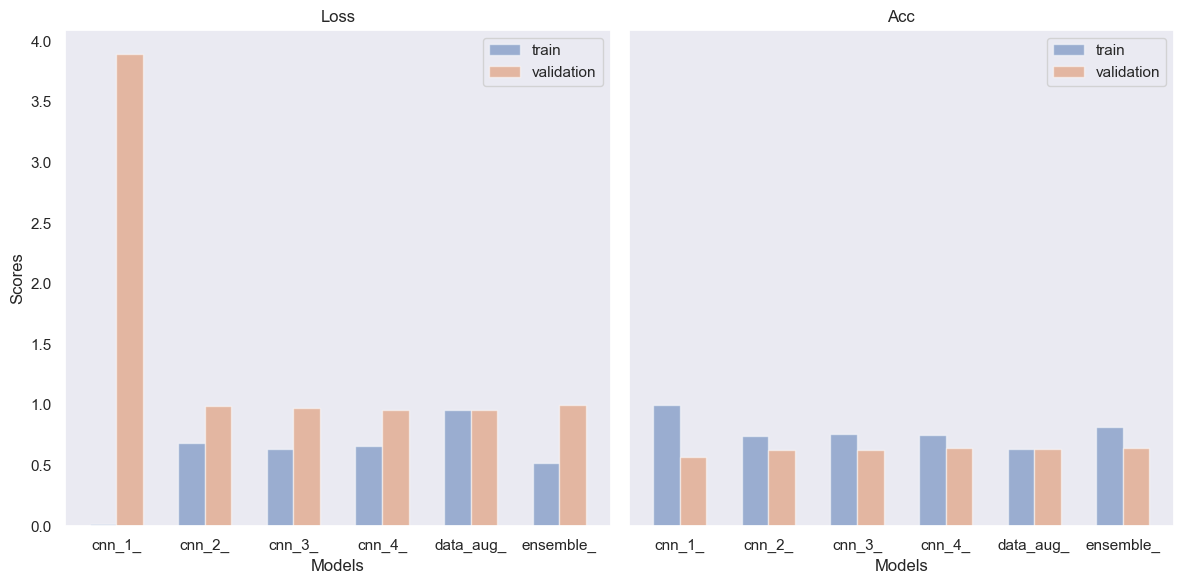

In [75]:
# Modified and sourced from previous project: DeepFake detector: https://github.com/annabchox/deepfake-detector/blob/main/Code/PretrainedModel/deepfake_model_tutorial.ipynb
def plot_bar(df, list_of_columns):

    # Configure figure and plots
    total_graphs = len(list_of_columns)
    fig, ax = plt.subplots(1, total_graphs, figsize=(12, 6), sharey=True)  # Increase the figsize parameter

    # Create data lists for graphing to loop over
    x_tick_labels = [f"{index[:10]}_" for index in df.index.to_list()]
    width = 0.3

    # Graphs the data
    ax[0].set_ylabel("Scores")
    for i in range(len(ax)):
        x_tick_indexes = np.arange(len(x_tick_labels))
        ax[i].set_title(f"{list_of_columns[i].title()}")
        ax[i].set_xlabel("Models")
        ax[i].bar(x_tick_indexes, df[f"train_{list_of_columns[i]}"], width, label="train", alpha=0.5)
        ax[i].bar(x_tick_indexes + width, df[f"val_{list_of_columns[i]}"], width, label="validation", alpha=0.5)
        ax[i].set_xticks(x_tick_indexes + width / 2, x_tick_labels)
        ax[i].legend(loc='best')
    plt.tight_layout()
    plt.savefig(f"../../Images/{list_of_columns[0]}_{list_of_columns[1]}.png")
    plt.show()
    return

plot_bar(df, ["loss", "acc"])



The graph above compares the custom CNN model metrics. Each x-tick represents a different model and their training and validation metrics. By evaluating the bar graph above, it is difficult to see that the ensemble model outperformed the rest of the models in validation accuracy. But, it is clear from this bar graph that the ensemble model is overfitting to the train dataset unlike the other models. In the future, this could be combatted by retrieving additional images from the web or trying to create an ensemble model of pretrained models. It may be possible that a custom CNN model performs better than a pretrained model because the efficientnet model is trained on `imagenet`, where thousands of random images that are not related to facial expression were utilized to train efficientnet. 